0.7853981633974483


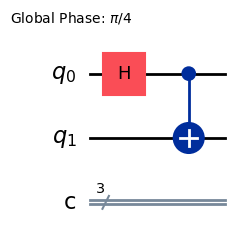

In [69]:
import numpy as np
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 3)
qc.h(0)
qc.cx(0, 1)
qc.global_phase = np.pi / 4
print(qc.global_phase)

qc.draw('mpl')

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


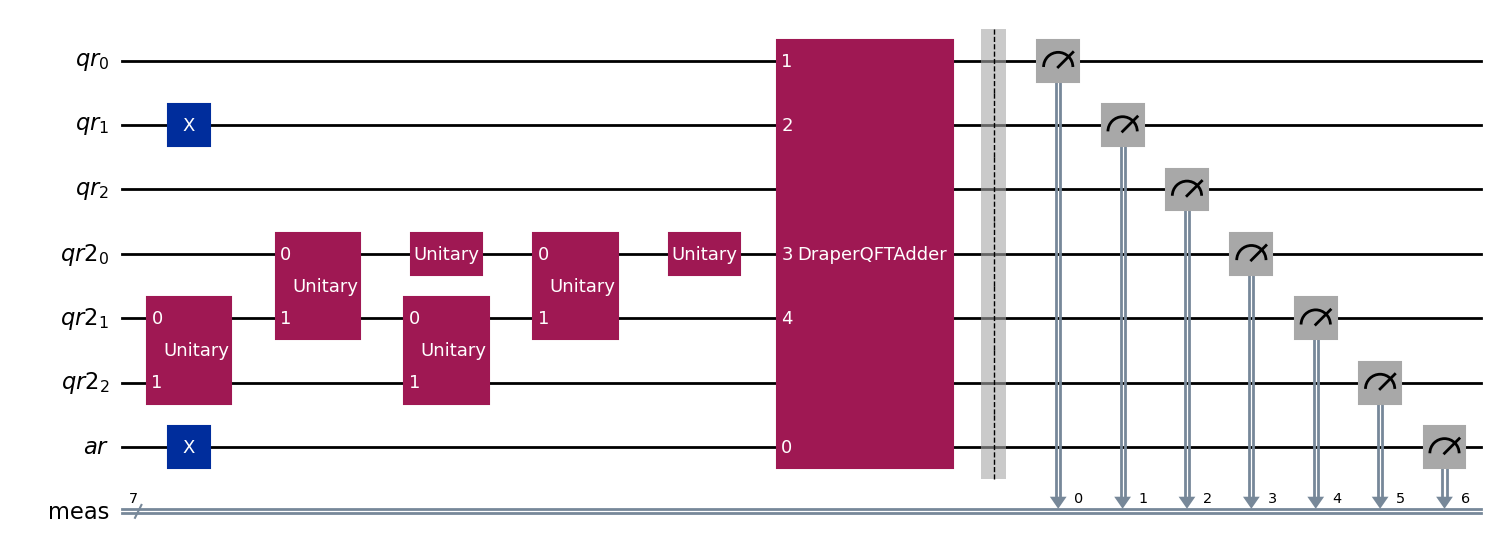

In [70]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.circuit.library import DraperQFTAdder
import numpy as np
from qiskit_mps_initializer.datatypes import QuantumState

qr = QuantumRegister(3, 'qr')
qr2 = QuantumRegister(3, 'qr2')

ar = AncillaRegister(1, 'ar')       
qc = QuantumCircuit(qr, qr2, ar)


psi = [1, 2, 3, 6, 7, 8, 9, 10]
state = QuantumState.from_dense_data(data=psi, normalize=True)
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers= number_of_mps_layers)
qc.compose(circuit, qubits= qr2, inplace=True)



qc.x(ar[0])
qc.x(qr[1])  


adder = DraperQFTAdder(num_state_qubits=2, kind='half')



qc.append(adder, ar[:] + qr[:2] + qr2[:2])   #problem > i am trying to pass 3 qubits from psi  to quantumregister 1 and 2  that holds 2 qubits each so total 2+2+1   but why we nned to have 3 qubit in register 1 why



qc.measure_all()

qc.draw('mpl')


DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
Statevector: Statevector([ 0.72914727+0.j,  0.44233699+0.j, -0.0894773 +0.j,
              0.18415959+0.j, -0.09298503+0.j, -0.12962377+0.j,
             -0.43784583+0.j, -0.11663528+0.j],
            dims=(2, 2, 2))
|000>: (0.7291472748150601+0j)
|001>: (0.44233698740134697+0j)
|010>: (-0.08947730244718945+0j)
|011>: (0.18415959168795396+0j)
|100>: (-0.09298503396398233+0j)
|101>: (-0.12962377048275275+0j)
|110>: (-0.43784583094023666+0j)
|111>: (-0.11663527877695298+0j)
Counts: {np.str_('000'): np.float64(0.531655748370229), np.str_('001'): np.float64(0.195662010423299), np.str_('010'): np.float64(0.008006187653226), np.str_('011'): np.float64(0.033914755210674), np.str_('100'): np.float64(0.008646216541283), np.str_('101'): np.float64(0.016802321874165), np.str_('110'): np.float64(0.191708971671746), np.str_('111'): np.float64(0.013603788255378)}


/tmp/ipykernel_1084/3338028348.py:28: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


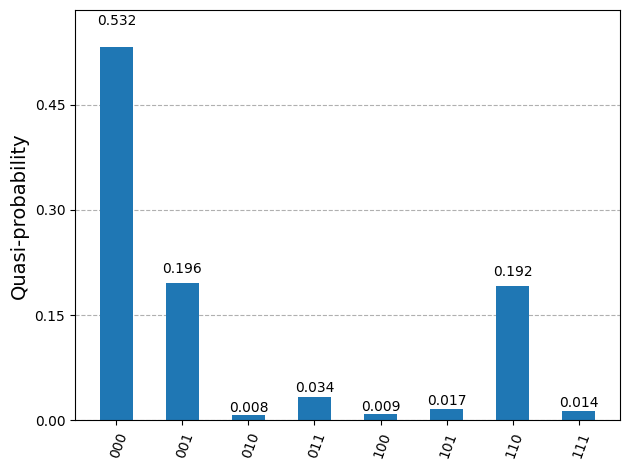

In [71]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import QuantumRegister, AncillaRegister, QuantumCircuit, transpile
import numpy as np
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram


psi = [1, 3, 1, 2, 7, 1, 1, 1]


number_of_mps_layers = 2
state = QuantumState.from_dense_data(data=psi, normalize=True)


qc = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)


simulator = AerSimulator(method='automatic')
qc = transpile(qc, simulator)
qc.save_statevector()

result = simulator.run(qc, shots = 1000).result()
statevector = result.get_statevector()


print("Statevector:", statevector)
for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")



counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)







    

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
Final statevector after initialization:
|000>: (-0.08541028748217278+0j)
|001>: (0.9224883899461818+0j)
|010>: (-0.2763637596498507+0j)
|011>: (-0.1856034818052563+0j)
|100>: (-0.07022230149060386+0j)
|101>: (-0.07023305024597429+0j)
|110>: (-0.14377842206206887+0j)
|111>: (0.0189363533060153+0j)
Counts: {np.str_('000'): np.float64(0.007294917207787), np.str_('001'): np.float64(0.850984829585499), np.str_('010'): np.float64(0.0763769276478), np.str_('011'): np.float64(0.034448652458234), np.str_('100'): np.float64(0.004931171626637), np.str_('101'): np.float64(0.004932681346854), np.str_('110'): np.float64(0.020672234650658), np.str_('111'): np.float64(0.00035858547653)}


/tmp/ipykernel_1084/1128986306.py:26: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


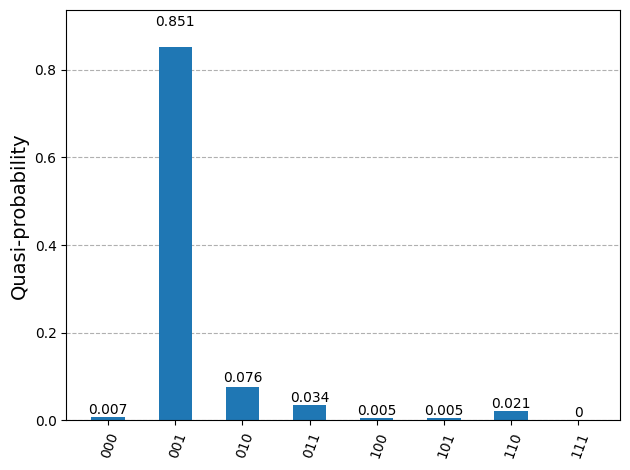

In [76]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import transpile
from qiskit_aer import AerSimulator

# 1. Define and normalize your wavefunction
psi = [1, 3, 1, 2, 7, 8, 0, 1]
state = QuantumState.from_dense_data(data=psi, normalize=True)

# 2. Generate MPS initializer circuit
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)

circuit.measure_all

# 3. Simulate the initialized state (before measurement)
simulator = AerSimulator(method='automatic')
circuit.save_statevector()  # Save the full wavefunction

# 4. Transpile and run
circuit = transpile(circuit, simulator)
result = simulator.run(circuit).result()

# 5. Get and print the final statevector
statevector = result.get_statevector()
print("Final statevector after initialization:")
for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")

counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)



In [ ]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Define your wavefunction
psi = [1, 3, 1, 2, 7, 8, 0, 1]

# 2. Create normalized QuantumState
state = QuantumState.from_dense_data(data=psi, normalize=True)

# 3. Generate MPS initializer circuit
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)

# 4. Add measurements to all qubits

# 5. Simulate using AerSimulator with 1000 shots
simulator = AerSimulator(method='automatic')
circuit = transpile(circuit, simulator)
result = simulator.run(circuit, shots=1000).result()

# 6. Get measurement counts
counts = result.get_counts()

# 7. Print and plot
print("Measurement results (bitstrings):")
for bitstring, count in counts.items():
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.title("Measurement Outcome Histogram")
plt.show()


DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


QiskitError: 'No counts for experiment "0"'